In [1]:
from TTVFit.ttvfit import *

In [2]:
period = 3.06785234
target = 'WASP-80b'
data = pd.read_csv('example/t.csv')
data

,Epoch,T_mid,Uncertainty,Label,Reference
0,0,2.456055e+06,0.000182,Others,2021ApJS..255...15W&2014A&A…562A.126M; 2013A&A...
1,23,2.456125e+06,0.000067,Others,2013A&A...551A..80T
2,26,2.456135e+06,0.000168,Others,2021ApJS..255...15W&2014A&A…562A.126M; 2013A&A...
3,41,2.456181e+06,0.000192,Others,2021ApJS..255...15W&2014A&A…562A.126M; 2013A&A...
4,132,2.456460e+06,0.000086,Others,2021ApJS..255...15W&2014A&A...562A.126M&2018MN...
5,142,2.456490e+06,0.000091,Others,2014ApJ...790..108F
6,151,2.456518e+06,0.000120,Others,2014ApJ...790..108F
7,154,2.456527e+06,0.000160,Others,2014ApJ...790..108F
8,164,2.456558e+06,0.000180,Others,2014ApJ...790..108F
9,169,2.456573e+06,0.000088,Others,2014ApJ...790..108F


In [3]:
eccentricity_est = [0,0.1,'U']
omega_est = [0,2*np.pi,'U']
p_dot_est = [0,200,'N']
domega_est = [0,1e-1,'N']

period_est = [period - 0.0002, period + 0.0002,'U']
times0 = data['T_mid'][0]
times0_est = [times0 - 0.05, times0 + 0.05,'U']

pdot_parameters = [
    p_dot_est,
]

precession_parameters = [
    eccentricity_est,
    omega_est,
    domega_est,
]

kind = 'Precession'
# kind = 'Pdot'
# kind = 'Linear'
rej_sigma = 5
multiprocessing = True
# sampler = 'emcee'
# sampler = 'dynesty'
sampler = 'dynamic_dynesty'
parameters = [times0_est,period_est]
parameter_names = [r'$t_0$',r'$Period$']

sampler_parameters = {
    'emcee':{
        'nwalkers':100,
        'nsteps':2000,
        'nburnin':200,
    },
    'dynesty':{
        'nlive':10000,
        'dlogz':0.0001,
    },
    'dynamic_dynesty':{
        'nlive_init':30000,
        'dlogz_init':0.001,
    }
}

if kind == 'Precession':
    parameters += precession_parameters
    parameter_names += [r'$eccentricity$',r'$\omega[radian]$',r'$d\omega/dN[radian/epoch]$']
    print(parameters)
elif kind == 'Pdot':
    parameters += pdot_parameters
    parameter_names += [r'$\dot{P}[ms/yr]$']
    print(parameters)
else:
    print(parameters)

TTVFIT = TTVFit(data,period,parameters,parameter_names,kind,rej_sigma,multiprocessing=multiprocessing,sampler=sampler,sampler_parameters=sampler_parameters[sampler])

[[2456054.8069988564, 2456054.906998856, 'U'], [3.06765234, 3.06805234, 'U'], [0, 0.1, 'U'], [0, 6.283185307179586, 'U'], [0, 0.1, 'N']]
You are fitting TTV with Precession model


Fitting begins...
You are fitting TTV with Precession model


Start dynamic dynesty


1129891it [2:37:15, 119.75it/s, batch: 0 | bound: 416 | nc: 1 | ncall: 25898089 | eff(%):  4.363 | loglstar:   -inf < -26.071 <    inf | logz: -55.826 +/-  0.030 | dlogz:  0.000 >  0.001]        


Finish dynamic dynesty
Multiprocessing took 9439.0 seconds
rej: 0.0034418896008503977

Rejection =  0.0034418896008503977 

All keys =  [0]
You are fitting TTV with Linear model
Start dynamic dynesty


750210it [24:05, 518.95it/s, batch: 0 | bound: 136 | nc: 1 | ncall: 14560395 | eff(%):  5.152 | loglstar:   -inf < -69.829 <    inf | logz: -86.928 +/-  0.023 | dlogz:  0.000 >  0.001]           


Finish dynamic dynesty
Multiprocessing took 1446.3 seconds

The BIC_pre is 71.92422947114923
Parameters_pre : 
 $t_0$ = (2456054.856945381, 8.285744115710258e-05, 5.598599091172218e-05) 
$Period$ = (3.067852615587188, 7.372791444026916e-08, 8.364530135196446e-08) 
$eccentricity$ = (0.0005948394803863747, 6.000254650411223e-05, 6.848731201703948e-05) 
$\omega[radian]$ = (6.211714830780624, 0.05145427651404155, 0.09198639952595489) 
$d\omega/dN[radian/epoch]$ = (-0.010415497932710138, 0.00022134749187856066, 0.00020249841568884333)  

Fitting ends...


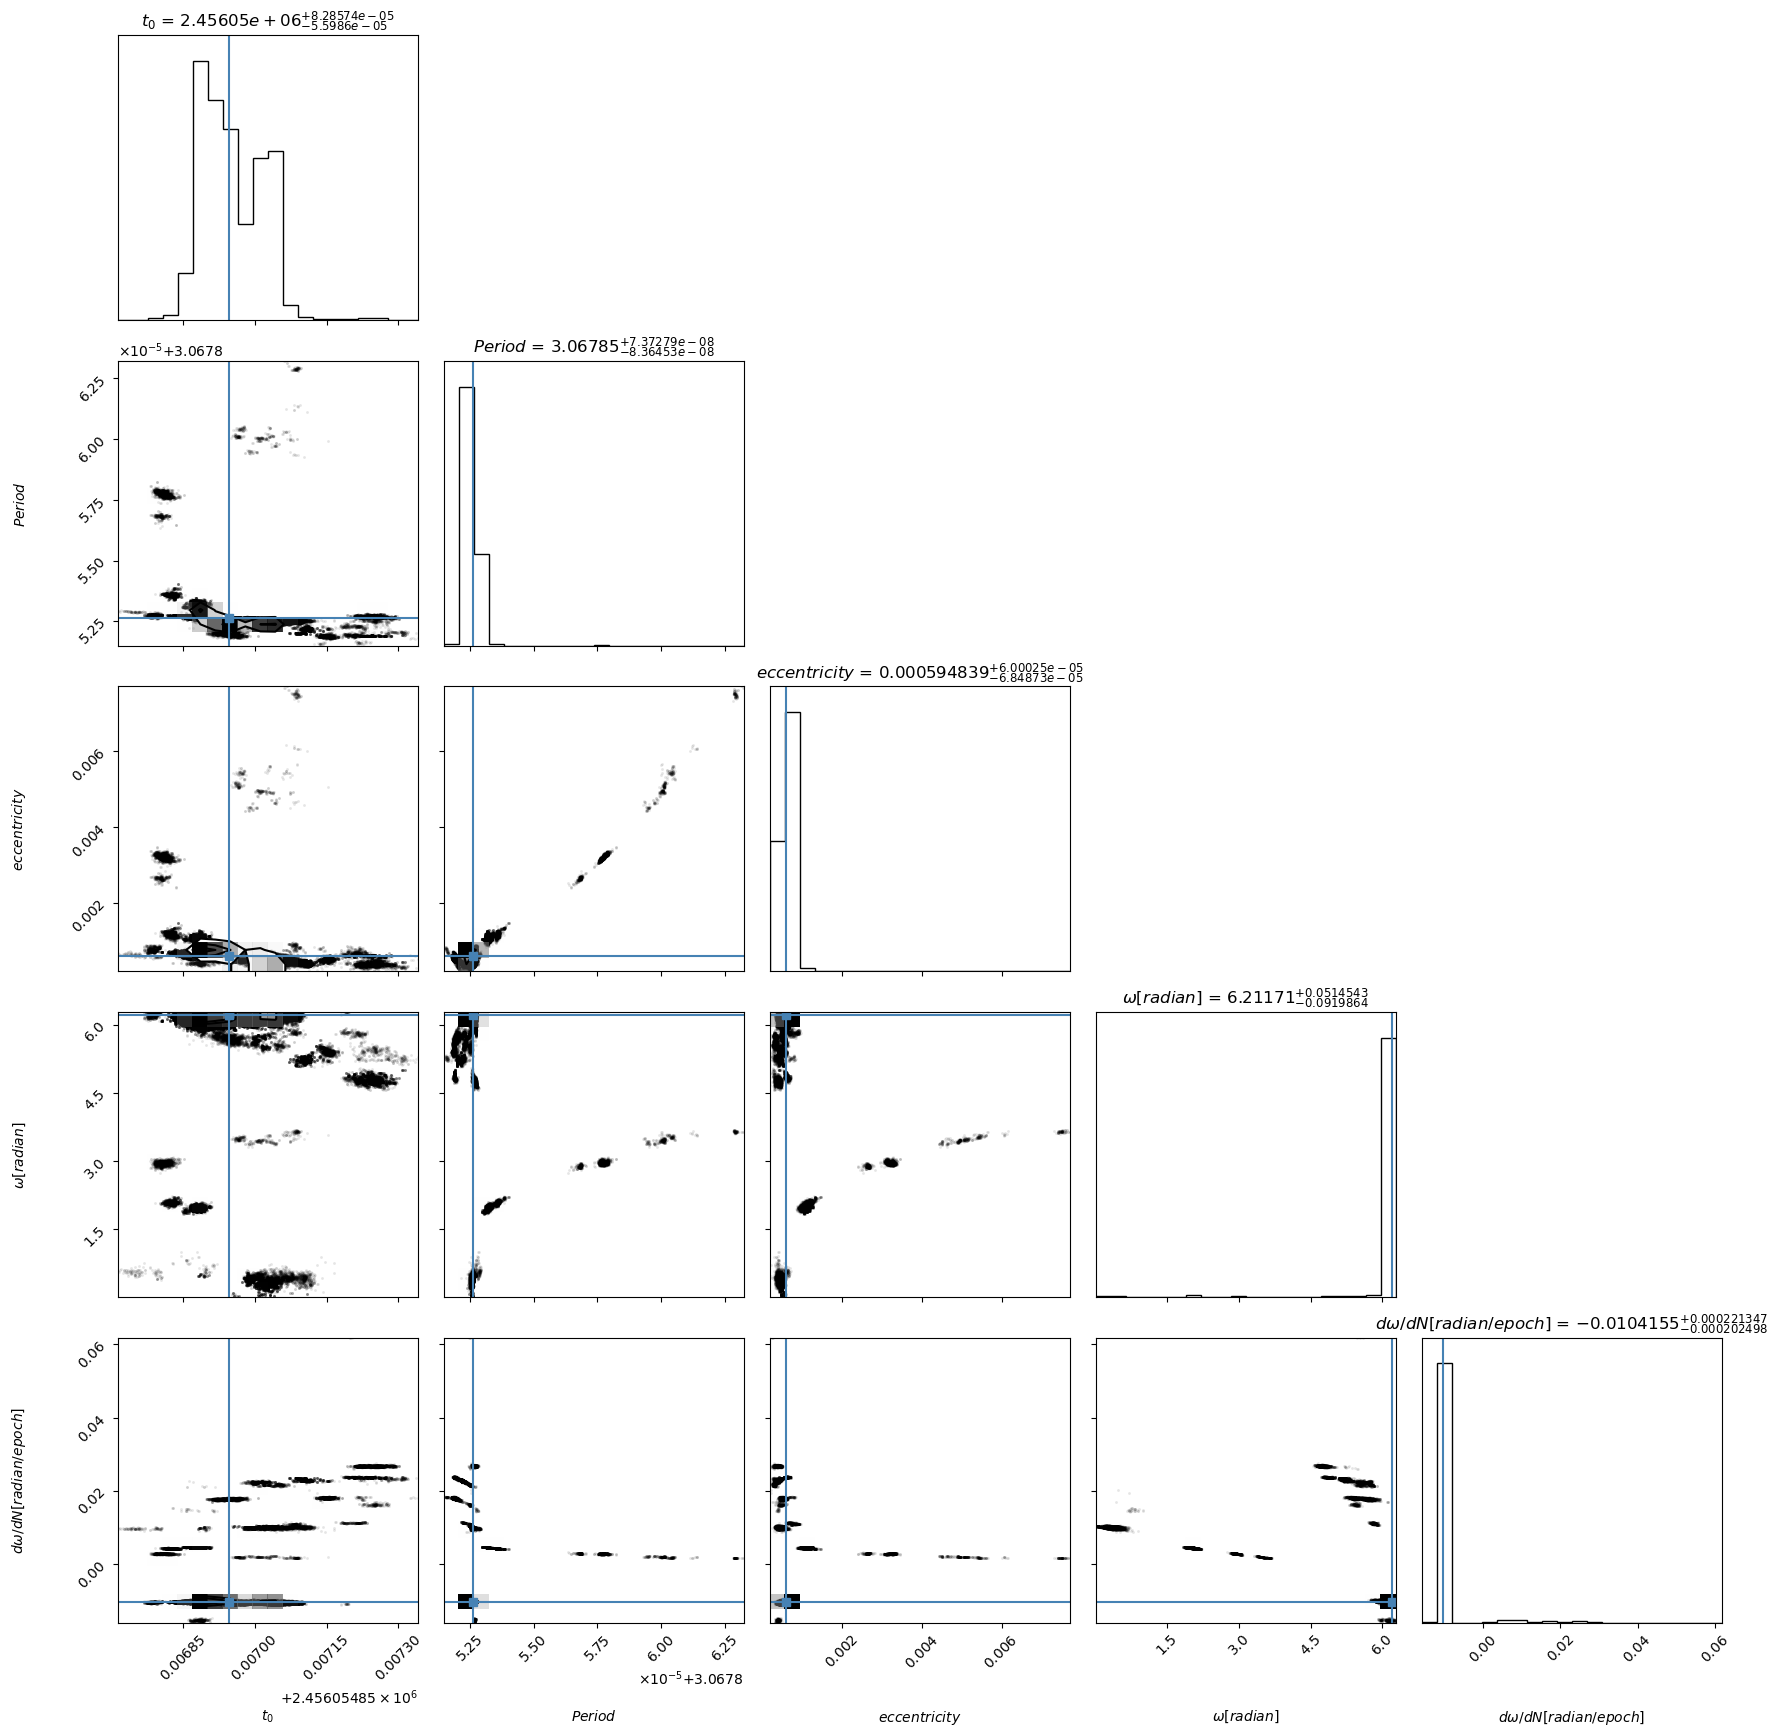

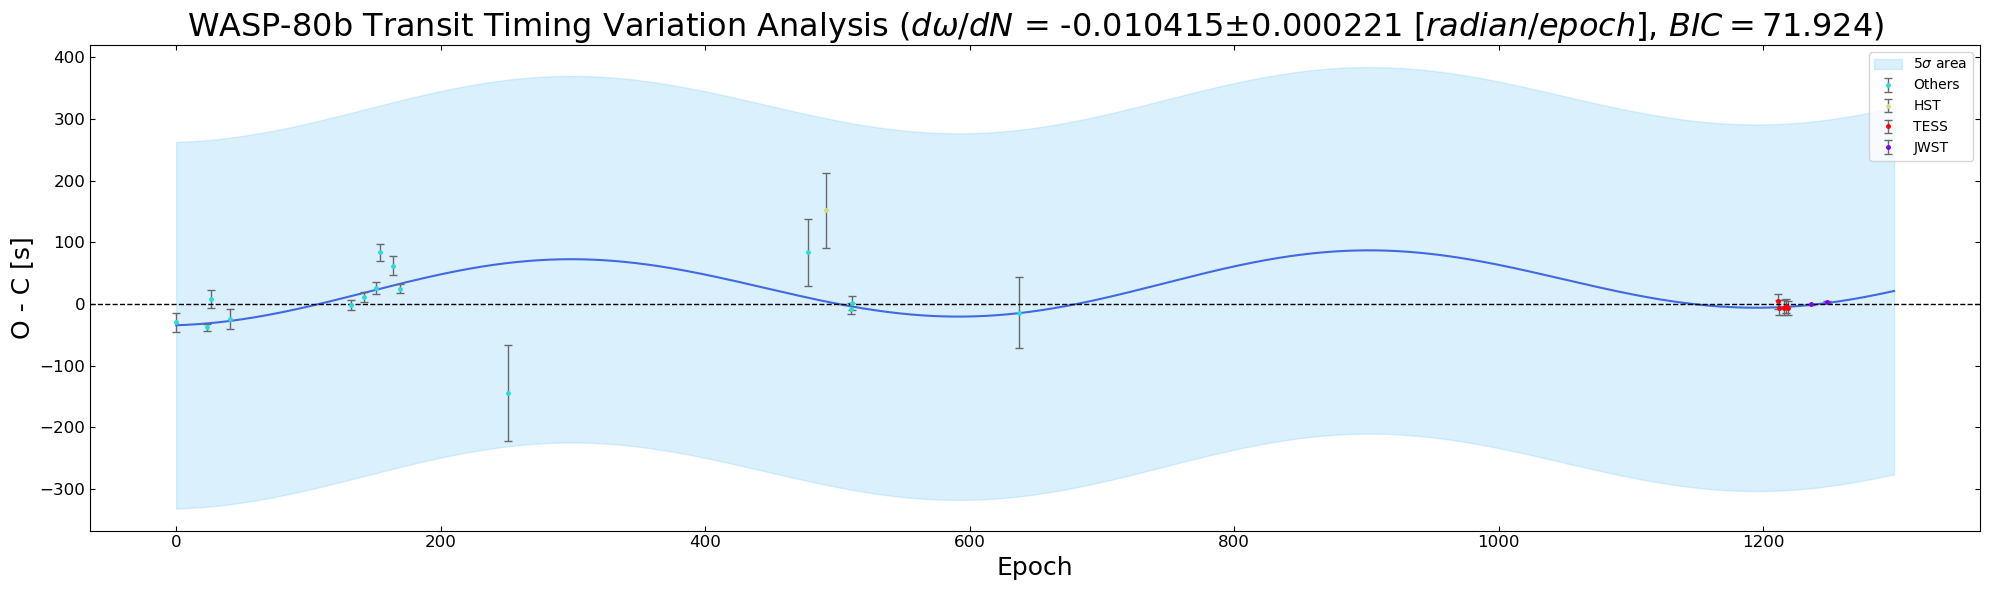

In [4]:
suffix = '_%ssigma'%rej_sigma
if kind != 'Linear':
    suffix += '_%s_%s_%s_%s'%(sampler,kind,target,parameters[-1])
else:
    suffix += '_%s_%s_%s'%(sampler,kind,target)
# suffix += ''
title = '%s Transit Timing Variation Analysis'%target
samples = TTVFIT.Fit('example/4/',suffix,title)